# Multivariate Resemblance Analysis (MRA) Dataset F

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from multivariate_resemblance import get_numerical_correlations
from multivariate_resemblance import plot_correlations
from multivariate_resemblance import get_categorical_correlations
from multivariate_resemblance import compute_mra_score

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/F_IndianLiverPatient_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/F_IndianLiverPatient_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/F_IndianLiverPatient_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/F_IndianLiverPatient_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/F_IndianLiverPatient_Synthetic_WGANGP.csv'}
categorical_columns = ['gender','class']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':      age  gender   TB   DB  alkphos  sgpt   sgot   TP  ALB   A_G class
 0     68  Female  0.6  0.1   1620.0  95.0  127.0  4.6  2.1  0.80   1.0
 1     31    Male  1.3  0.5    184.0  29.0   32.0  6.8  3.4  1.00   1.0
 2     28    Male  0.8  0.3    190.0  20.0   14.0  4.1  2.4  1.40   1.0
 3     60    Male  2.3  0.6    272.0  79.0   51.0  6.6  3.5  1.10   1.0
 4     48  Female  0.9  0.2    173.0  26.0   27.0  6.2  3.1  1.00   1.0
 ..   ...     ...  ...  ...      ...   ...    ...  ...  ...   ...   ...
 461   75  Female  0.8  0.2    188.0  20.0   29.0  4.4  1.8  0.60   1.0
 462   36    Male  5.3  2.3    145.0  32.0   92.0  5.1  2.6  1.00   2.0
 463   37    Male  0.7  0.2    235.0  96.0   54.0  9.5  4.9  1.00   1.0
 464   17  Female  0.5  0.1    206.0  28.0   21.0  7.1  4.5  1.70   2.0
 465   17    Male  0.9  0.2    224.0  36.0   45.0  6.9  4.2  1.55   1.0
 
 [466 rows x 11 columns],
 'GM':      age  gender        TB        DB     alkphos        sgpt        sgot  \
 0     68    Male

## 2. Plot PPC matrixes and calculate matrixes norms

In [5]:
#compute correlation matrixes for all datasets
cors_numerical = dict()
norms_numerical = dict()
for name in DATA_TYPES :
    cors_numerical[name], norms_numerical[name] = get_numerical_correlations(data[name])
norms_numerical

{'Real': 3.733, 'GM': 3.996, 'SDV': 3.7259, 'CTGAN': 3.0382, 'WGANGP': 6.1606}

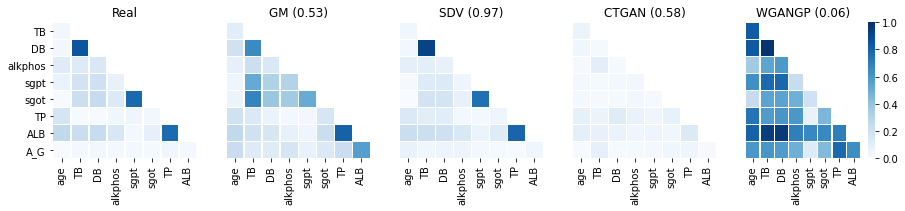

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 2.5))
axs_idxs = range(6)
idx = dict(zip(DATA_TYPES,axs_idxs))

for name_idx, name in enumerate(DATA_TYPES) :
    ax = axs[idx[name]]
    matrix = cors_numerical[name]
    
    if name_idx != len(DATA_TYPES) - 1:
        plot_correlations(matrix, ax, color_bar=False)
    else:
        plot_correlations(matrix, ax, color_bar=True)
    
    if name_idx > 0:
        ax.set_yticks([])    

    if name == 'Real' :
        ax.set_title(name)
    else :
        score = compute_mra_score(cors_numerical['Real'], matrix)
        ax.set_title(name + ' (' + str(score) + ')')
    
fig.savefig('MULTIVARIATE RESEMBLANCE RESULTS/PPC_Matrices.svg', bbox_inches='tight')

## 3. Plot correlations for categorical variables and calculate matrixes norms

In [7]:
#compute correlation matrixes for all datasets
cors_categorical = dict()
norms_categorical = dict()
for name in DATA_TYPES :
    cors_categorical[name], norms_categorical[name] = get_categorical_correlations(data[name])
norms_categorical

{'Real': 1.4142, 'GM': 1.4142, 'SDV': 1.4142, 'CTGAN': 1.4142, 'WGANGP': nan}

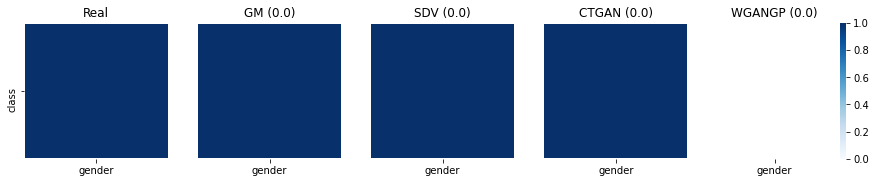

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 2.5))
axs_idxs = range(6)
idx = dict(zip(DATA_TYPES,axs_idxs))
first = True

for name_idx, name in enumerate(DATA_TYPES) :
    ax = axs[idx[name]]
    matrix = cors_categorical[name]
    
    if name_idx != len(DATA_TYPES) - 1:
        plot_correlations(matrix, ax, color_bar=False)
    else:
        plot_correlations(matrix, ax, color_bar=True)
    
    if name_idx > 0:
        ax.set_yticks([])    

    if name == 'Real' :
        ax.set_title(name)
    else :
        score = compute_mra_score(cors_numerical['Real'], matrix)
        ax.set_title(name + ' (' + str(score) + ')')
        
fig.savefig('MULTIVARIATE RESEMBLANCE RESULTS/Categorical_Matrices.svg', bbox_inches='tight')

## 4. Explore the results

In [9]:
norms_numerical

{'Real': 3.733, 'GM': 3.996, 'SDV': 3.7259, 'CTGAN': 3.0382, 'WGANGP': 6.1606}

In [10]:
norms_categorical

{'Real': 1.4142, 'GM': 1.4142, 'SDV': 1.4142, 'CTGAN': 1.4142, 'WGANGP': nan}

In [11]:
norms_data = [np.asarray(list(norms_numerical.values())), np.asarray(list(norms_categorical.values()))]
df_norms = pd.DataFrame(data=norms_data, columns=DATA_TYPES, index=['PPC_MATRIX_NORMS','CATEGORICAL_CORS_MATRIX_NORMS'])
df_norms.to_csv('MULTIVARIATE RESEMBLANCE RESULTS/Correlation_Matrix_Norms.csv')
df_norms

,Real,GM,SDV,CTGAN,WGANGP
PPC_MATRIX_NORMS,3.7330,3.9960,3.7259,3.0382,6.1606
CATEGORICAL_CORS_MATRIX_NORMS,1.4142,1.4142,1.4142,1.4142,NaN
